# Heart Attack Analysis and Prediction Tutorial
By Jonah Trani, Hans, Andy

### Introduction
Heart disease is the leading cause of death among men and women in the United States. According to the Center for Disease Control, around [655,000 people each year die from cardiovascular disease](https://www.cdc.gov/heartdisease/facts.htm) - thats one in every four deaths. 


By CDC 2019, in the US, it is estimated that someone has a heart attack every 4 seconds and about 805,000 Americans experience heart attack every year. Although this number contains a number of diseases including infections and genetic defects, many heart diseases can be prevented by healthy lifestyle choices. Over the years, we have been able to discern a number of risk factors for individuals, including high cholesterol and blood pressure. In this tutorial, we will be going through the entire data pipeline process, from data collection to analysis to create a model based off of these risk factors and predict individuals with higher risk of having heart-related illness.

---

### Data Collection

The first step in the data science pipeline is to collect our data. We will be using a number of useful Python 3 libraries including pandas, numpy, matplotlib, seaborn, and sckit-learn. These are all great tools for data sctructures, manipulation, and visualization.

In [1]:
## Import some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
## Load in data
df_heart = pd.read_csv("heart.csv")
df_heart.count()

age         303
sex         303
cp          303
trtbps      303
chol        303
fbs         303
restecg     303
thalachh    303
exng        303
oldpeak     303
slp         303
caa         303
thall       303
output      303
dtype: int64

In [3]:
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Reading more into the dataset we can see what each of these variables represents as it is not immediately clear. There are 8 categorical variables, including the output which we will be hoping to predict.
The descriptions of the variables are as follows:

- **age**: The age of the person
- **sex**: 0 if female, 1 if male
- **cp**: chest pain type, 1 if typical angina, 2 if atypical angina, 3 if non-anginal pain, and 4 if asymptomatic
- **trtbps**: resting blood pressure
- **chol**: cholesterol level
- **fbs**: fasting blood sugar level, 0 if <= 120 mg/dl, 1 if > 120 mg/dl
- **restecg**: resting electrocardiographic results, 0 if normal, 1 if having ST-T wave abnormality, 2 if showing probable or definite left ventricular hypertrophy by Estes' criteria
- **thalachh**: person's maximum heart rate achieved
- **exng**: exercise induced angina, 1 if yes, 0 if no
- **oldpeak**: st depression induced by exercise relative to rest
- **slp**: slope of the peak exercise ST segment, 1 if upsloping, 2 if flat, 3 if downsloping
- **caa**: number of major vessels (0-3)
- **thall**: blood disorder called thalassemia, 0 if normal, 1 if fixed defect, 2 if reversable defect
- **output**: 1 if has heart disease, 0 if not

Of those, sex, cp, fbs, restecg, exng, slp, and thall are all dummy variables and will be treated as such in our analysis.

---
### Data Processing
Now that we've brought in our dataset, we need to tidy it and take care of any missing data. We want to do this to make sure our code isn't running into any columns with missing values that could mess with our results, rather first to take care of the missing data.

In [4]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

From this function we can see that our dataset is totally complete, so we have 303 individuals with no missing data. Since we will be using all the columns available for our dataset, we will keep the table as is but give the values better descriptions.

In [5]:
df_heart.columns = ["age", "sex", "chest_pain", "resting_bp", "cholesterol", "fasting_bloodsugar", "rest_ecg", "max_heartrate", "exercise_angina", 
                    "st_depression", "st_slope", "num_vessels", "thalassemia", "diagnosis"]

----
### Exploratory Data Analysis
With all our data ready to go, the next step is to look at our data and see if we can find any trends. First we can look at the spread of different variables, including age, sex, number of blood vessels, type of chest pain, cholesterol levels, and presence of thalassemia. Using the powerful seaborn functions countplot() and distplot() we can represent these plots. We will also be using the map() function to map our dummy variable values to more understandable values within the plots.

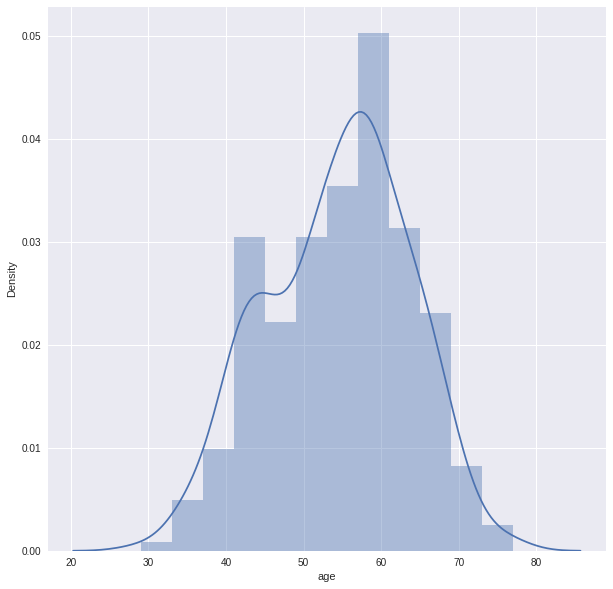

In [6]:
plt.figure(figsize=(10,10))
ax = sns.distplot(df_heart["age"])

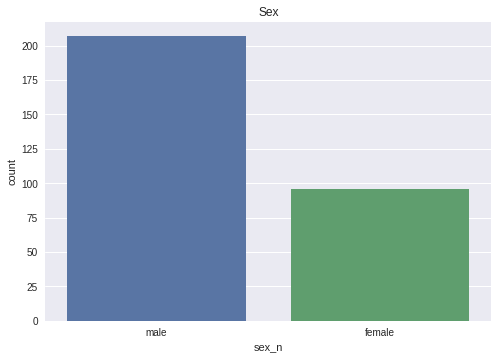

In [7]:
## Temporary hash key table to map to
s = { 0:"female", 1:"male" }
df_heart["sex_n"] = df_heart["sex"].map(s)
plt.title("Sex")
ax = sns.countplot(x="sex_n", data=df_heart)

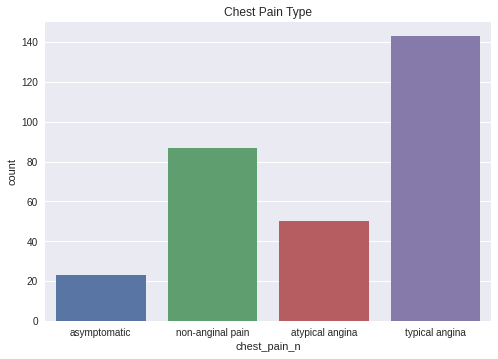

In [8]:
c = { 0:"typical angina", 1:"atypical angina", 2:"non-anginal pain", 3:"asymptomatic"}
df_heart["chest_pain_n"] = df_heart["chest_pain"].map(c)
plt.title("Chest Pain Type")
ax = sns.countplot(x="chest_pain_n", data=df_heart)

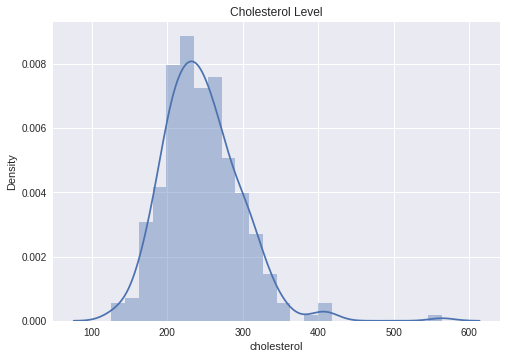

In [9]:
plt.title("Cholesterol Level")
ax = sns.distplot(df_heart["cholesterol"])

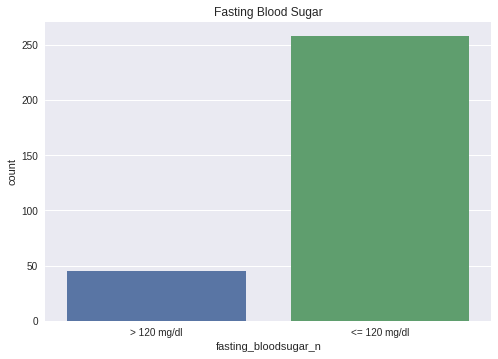

In [10]:
fb = { 0: "<= 120 mg/dl", 1: "> 120 mg/dl"}
df_heart["fasting_bloodsugar_n"] = df_heart["fasting_bloodsugar"].map(fb)
plt.title("Fasting Blood Sugar")
ax = sns.countplot(x = "fasting_bloodsugar_n", data = df_heart)

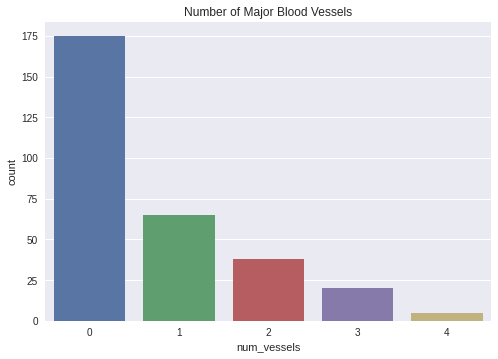

In [11]:
plt.title("Number of Major Blood Vessels")
ax = sns.countplot(x = "num_vessels", data = df_heart)

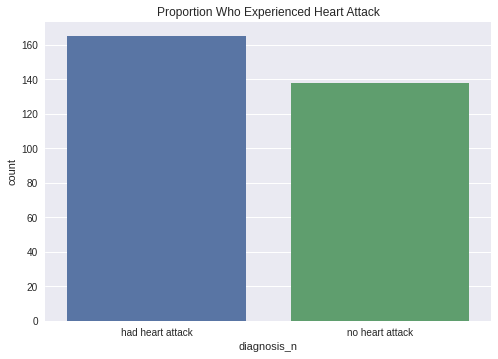

In [12]:
d = {0:"no heart attack", 1:"had heart attack"}
df_heart["diagnosis_n"] = df_heart["diagnosis"].map(d)
plt.title("Proportion Who Experienced Heart Attack")
ax = sns.countplot(x = "diagnosis_n", data = df_heart)

After looking at some countplots and distribution plots, we can break these down further to see if we see any patterns emerge in looking at these specific variables and people who have had heart issues.

<AxesSubplot:xlabel='sex_n', ylabel='count'>

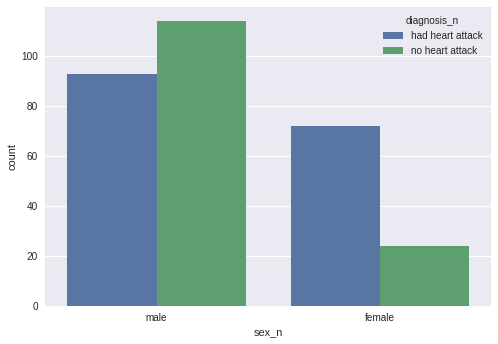

In [13]:
sns.countplot(x = "sex_n", hue = "diagnosis_n", data = df_heart)

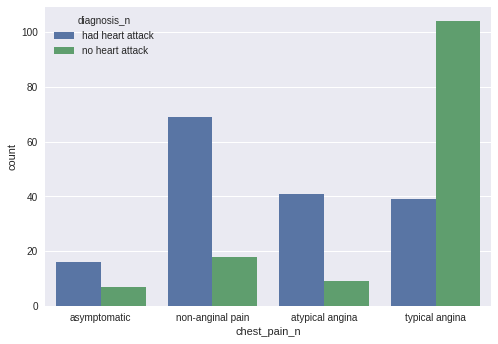

In [14]:
ax = sns.countplot(x = "chest_pain_n", hue = "diagnosis_n", data = df_heart)

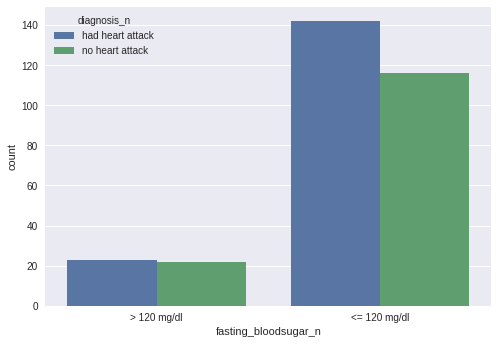

In [15]:
ax = sns.countplot(x = "fasting_bloodsugar_n", hue = "diagnosis_n", data = df_heart)

<AxesSubplot:xlabel='num_vessels', ylabel='count'>

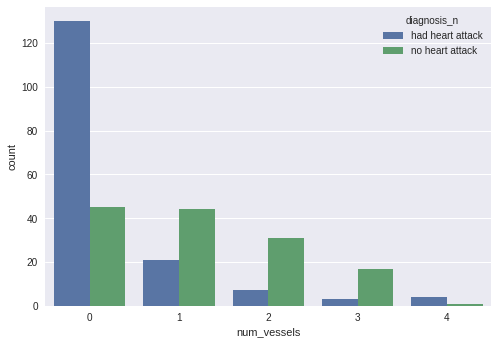

In [16]:
sns.countplot(x = "num_vessels", hue = "diagnosis_n", data = df_heart)

In [17]:
df_heart.drop(["chest_pain_n","fasting_bloodsugar_n", "diagnosis_n", "sex_n"], axis = 1)

,age,sex,chest_pain,resting_bp,cholesterol,fasting_bloodsugar,rest_ecg,max_heartrate,exercise_angina,st_depression,st_slope,num_vessels,thalassemia,diagnosis
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [18]:
df_heart.describe()

,age,sex,chest_pain,resting_bp,cholesterol,fasting_bloodsugar,rest_ecg,max_heartrate,exercise_angina,st_depression,st_slope,num_vessels,thalassemia,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Data Distrubition

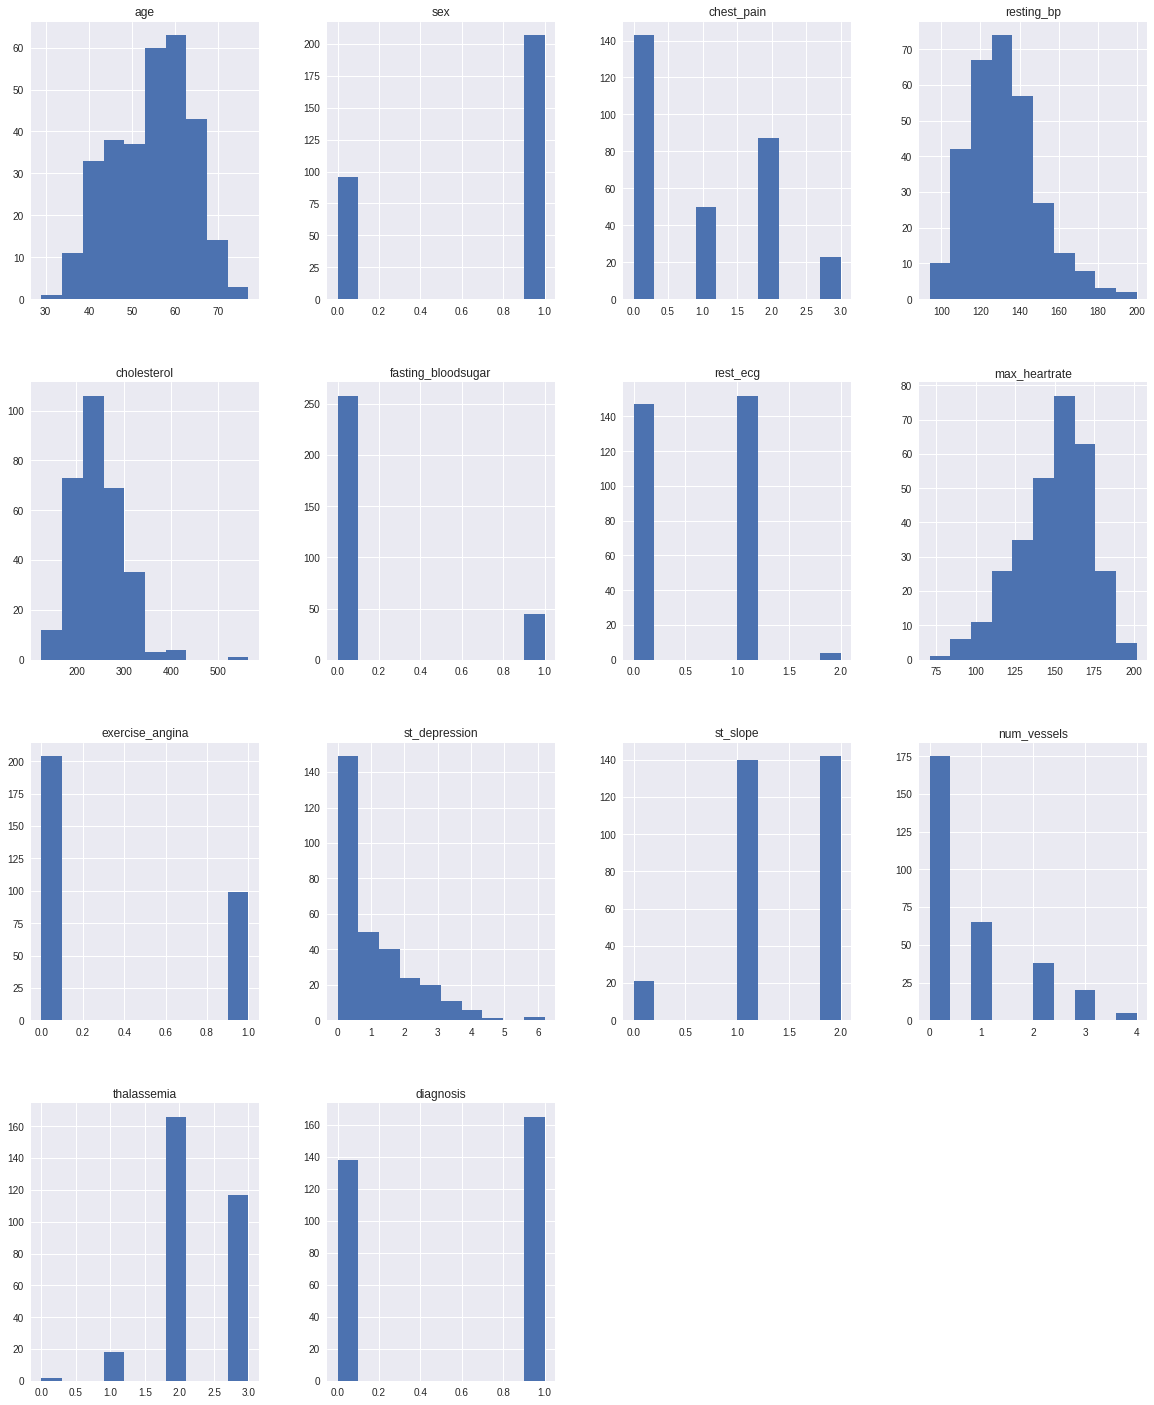

In [19]:
fig = plt.figure(figsize = (20,25))
ax = fig.gca()
df_heart.hist(ax = ax)
plt.show()

Ignoring dummy variables including sex, chest_pain, fasting_bloodsugar, rest_ecg, exercise_angina, st_slope and thal



####   Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

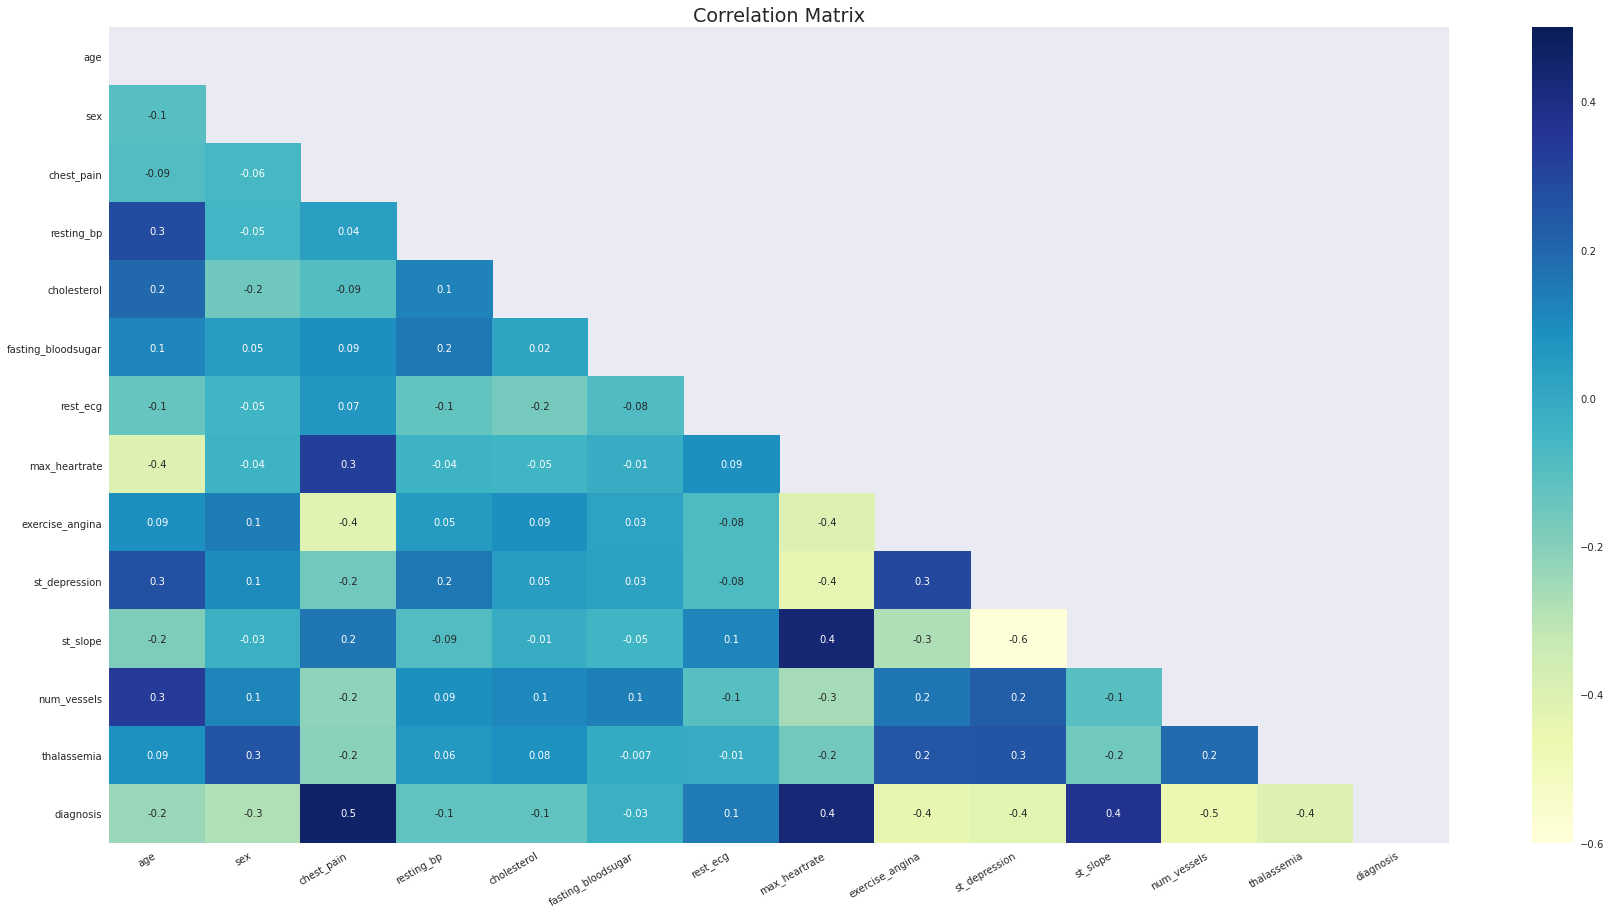

In [20]:
plt.subplots(figsize = (30,15))
mask = np.triu(np.ones_like(df_heart.corr(),dtype = np.bool))
corr_matrix = sns.heatmap(df_heart.corr("spearman"), mask = mask, annot = True, cmap = "YlGnBu", fmt = '.1g', vmin = -.6, vmax = 0.5)
sns.set(font_scale=1.6)
corr_matrix.set_xticklabels(corr_matrix.get_xticklabels(), rotation=30, horizontalalignment='right')
corr_matrix.set_title("Correlation Matrix")

The Spearman correlation matrix above gives the correlation value between each variable within the dataset. The color identifier on the left side of the graph indicates the the color of which variable are highly correlated with other variables. Where the darkest represent the most related variable and the lightest represent the most unrelated. We can see that some sets of data stands out:
- Diagnosis *&* Chest Pain - **0.5**


- Diagnosis *&* Max Heartrate - **0.4**
- Diagnosis *&* ST Slope - **0.4**
- Max Heartrate *&* ST Slope - **0.4**


- Age *&* Number of Vessels - **0.3**
- Age *&* ST Depression - **0.3**
- Age *&* Resting Blood Pressure - **0.3**
- Sex *&* Thalassemia - **0.3**
- Chest Pain *&* Max Heartrate - **0.3**
- Exercise Angina *&* ST Depression - **0.3**
- ST Depression *&* Thalassemia - **0.3**

After some analysis, we can see that our sample is around the age of 54, with a mean cholesterol level of 246 and max heart rate of 150. Most individuals had no major blood vessels, and <= 120 mg/dl fasting blood sugar. About two thirds of the sample was male, with a typical angina being the most common chest pain type. Going from here, we will need to move into looking at how we can predict if someone is at risk of experiencing a heart attack based on these factors.

We also took a look at the diagnosis of individuals while looking at some of these variables, and we can clearly see that the proportion of people with 0 major blood vessels may increase your risk of having a heart attack. Similarly, those who reported atypical angina or non-anginal pain had proportionally more subjects who had heart attacks than didn't.

---
### Machine Learning & Hypothesis Testing
Now that we have looked at our data and seen that some of these variables may pose for a higher risk of heart issues, the next step in the data science pipeline is hypothesis testing, therefore we must first come up with a hypothesis. We want the hypothesis to make a firm prediction that will ultimately be tested. We will make the hypothesis that there is a correlation between pre-existing conditions and risk of heart problems. 

To test this hypothesis, we use various machine-learning python methods to show a trend. Here we use a logistic regression model that uses the max heart rate and cholesterol of every person and use that to predict their diagnosis (of having heart disease or not). Of course, this step will take many factors and considerations for the model to be accurate, but this simple model shows the general steps.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression(solver='liblinear', random_state=0)

x = np.dstack((df_heart['max_heartrate'], df_heart['cholesterol']))[0] #Each element is a list of heartrate & cholesterol

y = np.array(df_heart['diagnosis'])
model.fit(x,y)
print("Intercepts: ", model.intercept_, "\nCoefs: ", model.coef_)

y_pred = model.predict(x)
report = classification_report(y, y_pred)
print("Report: \n", report)

Intercepts:  [-2.55548949] 
Coefs:  [[ 0.03039019 -0.00714716]]
Report: 
               precision    recall  f1-score   support

           0       0.70      0.51      0.59       138
           1       0.67      0.81      0.73       165

    accuracy                           0.68       303
   macro avg       0.68      0.66      0.66       303
weighted avg       0.68      0.68      0.67       303



Now that we have our model, we can output the basic attributes of it as well as a classification report detailing weighted averages. Now, we can test our model and make predictions based on a set of heartrate and cholesterol levels. The first & last element of our prediction array represent the extremes and correctly predicts the right outcome based on the extremity. Based on this very simple logistic regression, we can accurately predict the correlation of pre-existing conditions and the diagnosis!

In [22]:
import random
pred = [[60, 150]]
for i in range(10):
    pred.append([random.randint(60, 200), random.randint(150, 300)])
pred.append([200, 300])
print(pred, model.predict(pred))

[[60, 150], [174, 186], [118, 163], [138, 292], [155, 253], [154, 254], [139, 269], [143, 211], [127, 227], [190, 207], [183, 242], [200, 300]] [0 1 0 0 1 1 0 1 0 1 1 1]


### Conclusion (Insights Attained)
Just as the speech from Andrew Ng at Stanford, the potential of data science and machine learning is stupendous. In this project, we started from the potential risk that many people are experiencing now-heart disease, and used different methods to do data mining, data analysis and machine learning.

First, we did a data processing on the factors that could affected the heart-attack rate. In the section "Exploratory Data Analysis", we start from indepth anaylsis from the different varibles and visualized them as different plots. Next, we also show the correlation plots of the variables to help the machine learning that we will do for the next stage.

In the machine learning part, we taking all the infomation that we have into the model. By tuning the hyperparamter, learning rate, number of layers and etc. In our hypothesis testing we said that we picked variables based on how correlated they were based on our correlation matrix in the first section. From the result, all those regressions have p-value of less than 0.05. Thus, they were all deemed to be significant variables for our models and we cannot reject the null hypothesis.

In the final stage of the data science pipeline, we examine what we've learned through our data analysis. It is important to show what the trend is by explaining what the data shows. From the dataset and the analysis that we did above, when determining whether someone has the potential of suffering a heart-attack, we should more focusing the age and general life sytle. However, in the larger picture, we found that there may be many specific causes of heart disease, just like spider webs with intricate links. 

The structure of our analysis is shown below:

Data Collection ➡ Data Processing ➡ Exploratory Data Analysis  ➡ Machine Learning & Hypothesis Testing ➡ Conclusion

I hope that our project gives you a better understanding about the heart-attack preventation and how important the data science is.